In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [116]:
# read in dataframe
fuel_econ = pd.read_csv('fuel-econ.csv')
pokemon = pd.read_csv('pokemon.csv')

In [3]:
# convert VClass column to categorical datatype

# create list of car classes
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# set list to categorical datatype
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
# set VClass column value to categorical datatype
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [13]:
# create new column with string of just Automatic or Manual
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [14]:
print(fuel_econ.shape)
fuel_econ.head()

(3929, 21)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


# Size and Shape

In [16]:
# get random subset of dataframe for scatterplot

# (opt)get same seed as in lesson notes
np.random.seed(2018)

# get non-bootstrapped 
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

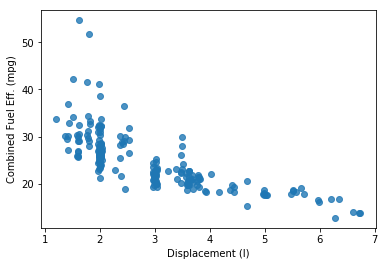

In [17]:
# scatter plot of engine size by combined fuel efficiency
# made more legible by using random subset of data plus jitter
# sns default linear regression curve turned off
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

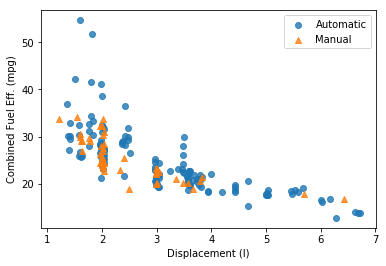

In [29]:
# add transmission type to previous scatter plot

# create list of lists with mapping of levels to symbol types
# use a list of lists rather than a dictionary for finer control over order that the levels are plotted
ttype_markers = [['Automatic', 'o'], # sets as circles
                ['Manual', '^']] # sets as triangles ('s' sets as squares)('x' sets as x's)

# loop over the list elements
# use ttype to select only the plots with the matching transmission type
# set the marker with marker in sns.regplot
for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sns.regplot(data = plot_data, x = 'displ', y = 'comb',
               x_jitter = 0.04, fit_reg = False, marker = marker);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

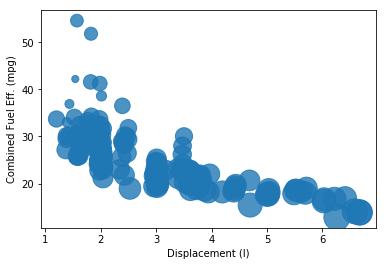

In [23]:
# add CO2 emissions as third variable using marker size
# in matplot lib use 's' parameter for size
# but in regplot need to use a dictionary as part of scatter_kws
# and explicitly assign full series instead of column name
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False,
           scatter_kws = {'s' : fuel_econ_subset['co2']});
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');


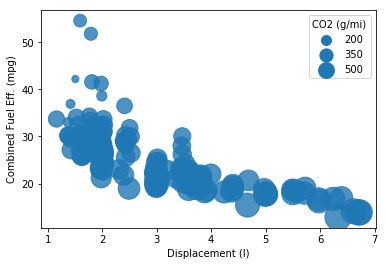

In [27]:
# same plot but with legend for sizes
sns.regplot(data = fuel_econ_subset, x = 'displ', y = 'comb',
           x_jitter = 0.04, fit_reg = False,
           scatter_kws = {'s' : fuel_econ_subset['co2']});
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

# create list of sizes
sizes = [200, 350, 500]
# get base color for plot
base_color = sns.color_palette()[0]
# create empty legend list
legend_obj = []
# loop through sizes and add necessary point sizes
for s in sizes:
    legend_obj.append(plt.scatter([],[],s = s/2, color = base_color))
# first argument is objects to be depicted in the legend, second is the list of labels 
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

# Color

In [31]:
# redo getting random subset of dataframe for following plots
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

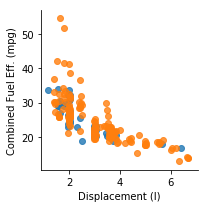

In [33]:
# scatterplot of engine size and combined fuel efficiency by color as transmission type
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'trans_type')
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

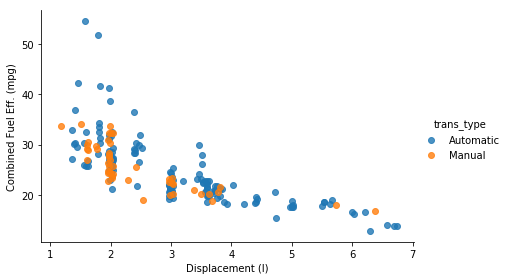

In [39]:
# change order of plot layers using hue_order, and adjust height and aspect ratio of plot to better view
# also add legend
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

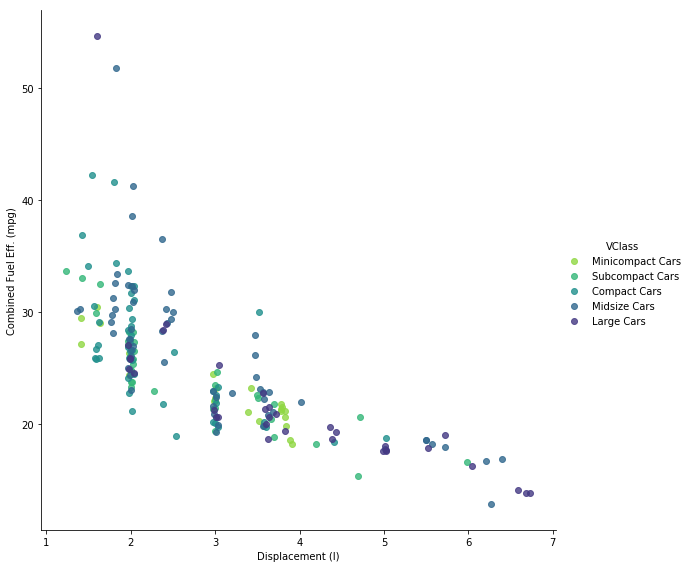

In [44]:
# instead plotting VClass as non-positional variable
# because it's an ordered variable, it's better to use a sequential palatte
g = sns.FacetGrid(data = fuel_econ_subset, hue = 'VClass', height = 8, aspect = 1, palette = 'viridis_r')
g.map(sns.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

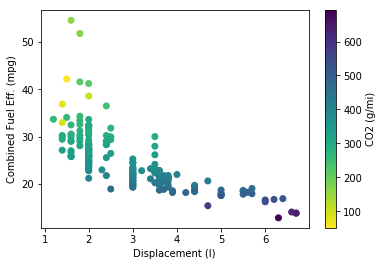

In [47]:
# because Facetgrid only expect categorical variables, need to use plt.scatter for numerical variable like co2
# otherwise would have giant legend for every unique co2 value
# instead use plt.scatter
# use cmap for color palette
# use colorbar and label for legend
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
           cmap = 'viridis_r')
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Faceting

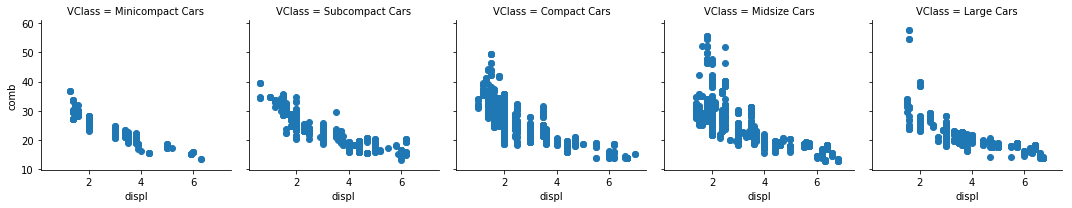

In [48]:
# easy facetgrid showing engine size and combined fuel efficiency for each vehicle class 
g = sns.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.scatter, 'displ', 'comb');

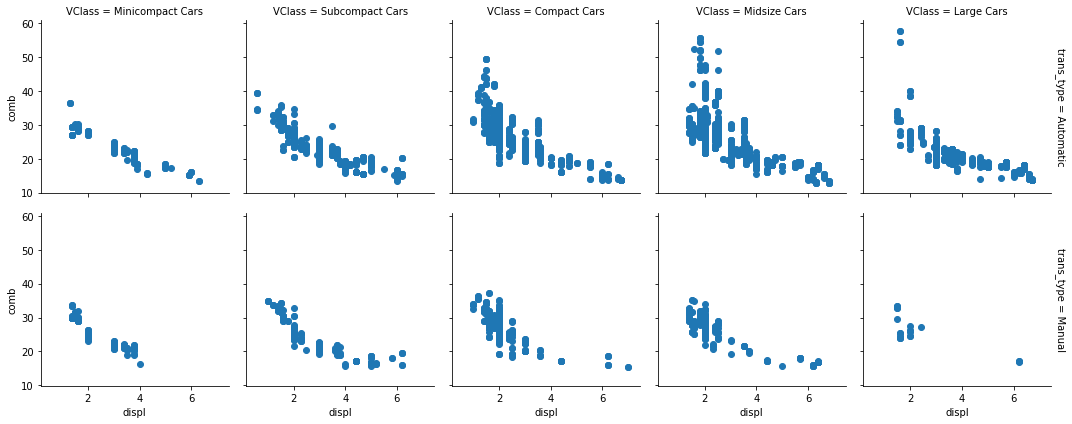

In [50]:
# adding an additional dimension of transmission type
# use margin_titles to move titles to the edges of the grid
g = sns.FacetGrid(data = fuel_econ, col = 'VClass', row = 'trans_type', margin_titles = True)
g.map(plt.scatter, 'displ', 'comb');

# Adaptations

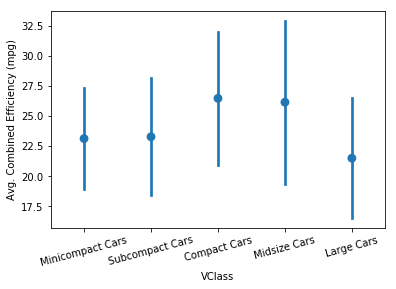

In [60]:
# older bivariate point plot of average combined fuel efficiency by vehicle class
# ci is confidence intervals and ste to standard deviation
sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = '');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Efficiency (mpg)');

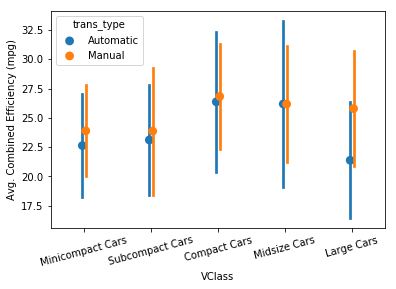

In [54]:
# added hue to show differences between transmission types
# dodge to True keeps the two sets of lines frmo overlapping
sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type', ci = 'sd', linestyles = '', dodge = True);
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Efficiency (mpg)');

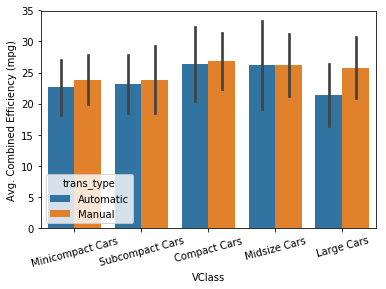

In [61]:
# clustered bar chart with standard deviation lines
sns.barplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', hue = 'trans_type');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Efficiency (mpg)');

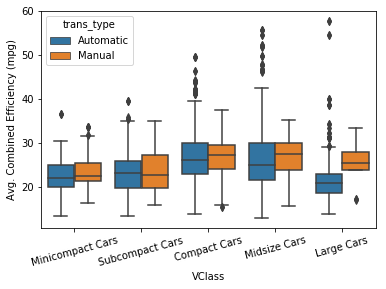

In [62]:
# can also get a clustered boxplot
sns.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Efficiency (mpg)');

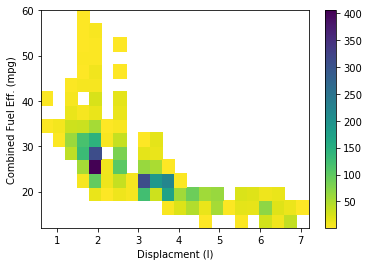

In [73]:
# older heatmap of engine size and combined fuel efficiency
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.xlabel('Displacment (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar();

In [76]:
# instead of color representing count, gonna change so color represents average CO2 emissions
# for this using weights parameter in hist2d, which says what the weight of each value plotted is
# default weight is one for every one point
# instead going to make the weight of each point = the co2 emissions / the number of cars in that bin

# using pd.cut to figure out which bin each value goes into
displ_bins = pd.cut(fuel_econ['displ'], bins_x, right = False, include_lowest = False, labels = False).astype(int)
comb_bins = pd.cut(fuel_econ['comb'], bins_y, right = False, include_lowest = False, labels = False).astype(int)

In [81]:
# counting points per bin
n_points = fuel_econ.groupby([displ_bins, comb_bins]).size()

In [82]:
# putting counts in an array
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

In [83]:
#  use co2 column and divide by points in each bin
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

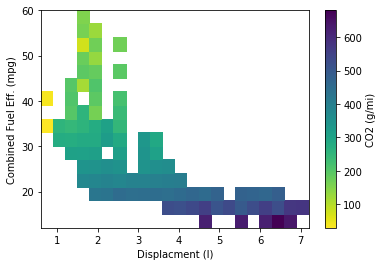

In [85]:
# then add weights parameter and label to color plot
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y],
          weights = co2_weights);
plt.xlabel('Displacment (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label = 'CO2 (g/mi)');

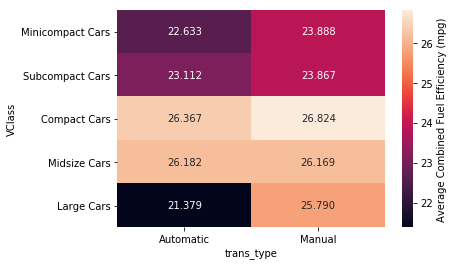

In [89]:
# alternative version for two categorical variables and one quantitative
# getting series of average for combined fuel efficiency broken down by transmission type and vehicle class
cat_means = fuel_econ.groupby(['trans_type', 'VClass']).mean()['comb']
# turn into dataframe
cat_means = cat_means.reset_index(name = 'comb_avg')
# pivot so that columns are transmission type, vehicle classes are rows, and values are cells
cat_means = cat_means.pivot(index = 'VClass', columns = 'trans_type', values = 'comb_avg')
# heatmap showing average combined fuel efficiency for each transmission type and vehicle class
sns.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label': 'Average Combined Fuel Efficiency (mpg)'});

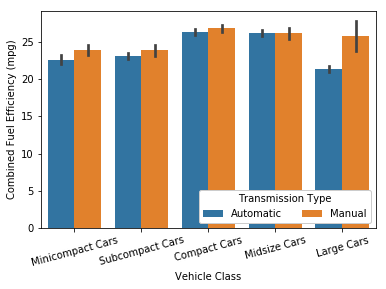

In [108]:
# super easy alternative clustered bar chart, using hue parameter for third variable
ax = sns.barplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type');
# loc for location of legend, ncol to make legend one row, frame_alpha = 1 sets legend to opaque
ax.legend(loc = 4, ncol = 2, framealpha = 1, title = 'Transmission Type')
plt.xticks(rotation = 15);
plt.xlabel('Vehicle Class');
plt.ylabel('Combined Fuel Efficiency (mpg)');

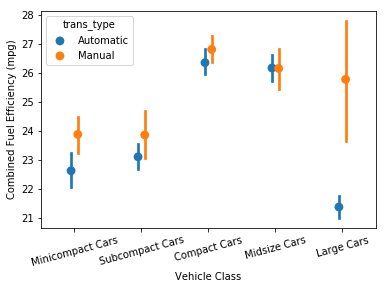

In [114]:
# another alternative using pointplot
# note that without linestyles = "" all points of one color would connect
ax = sns.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', hue = 'trans_type', dodge = 0.1, linestyles = "")
plt.xticks(rotation = 15);
plt.xlabel('Vehicle Class');
plt.ylabel('Combined Fuel Efficiency (mpg)');

# Plot Matrices

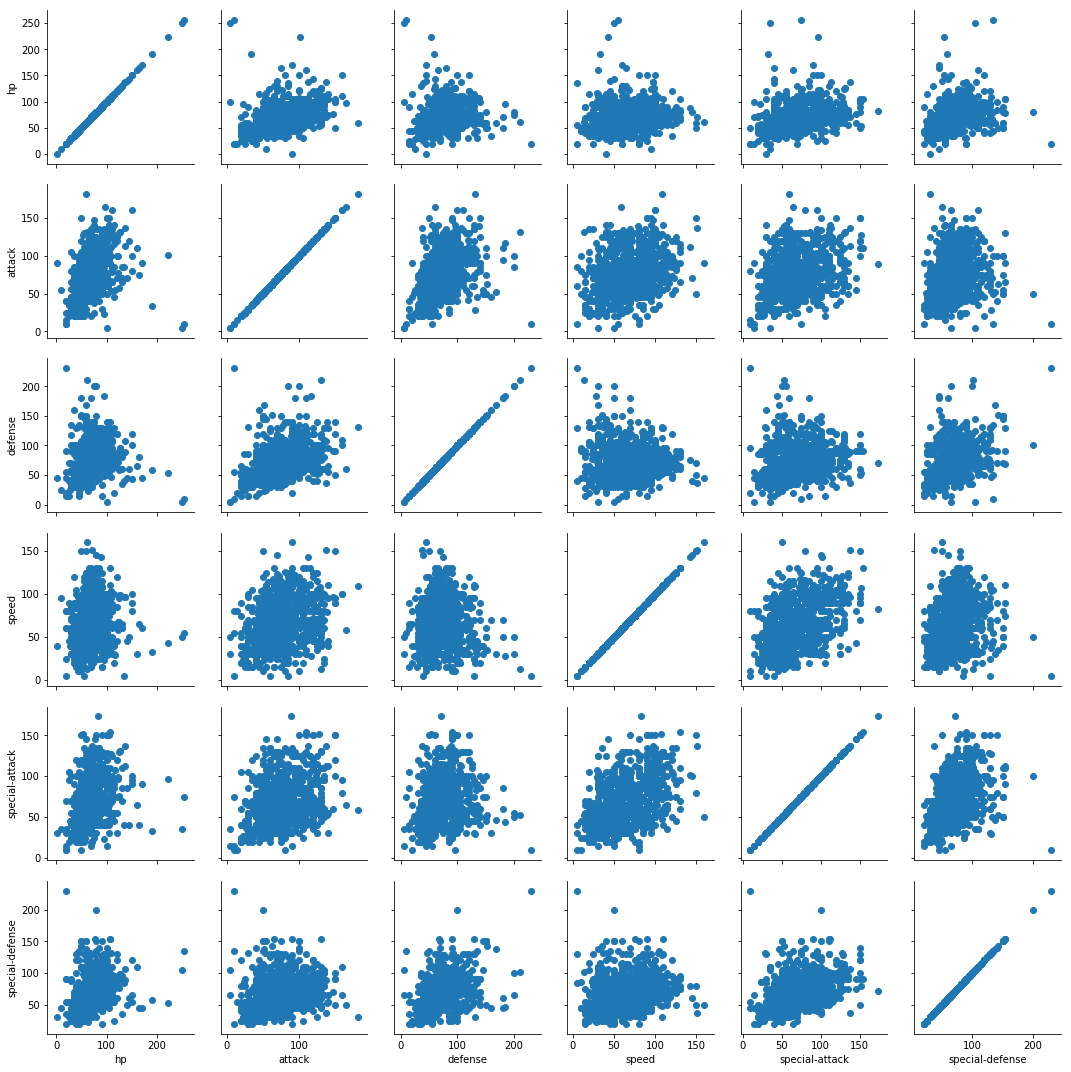

In [118]:
# plot matrix to compare many stats at once using sns.PairGrid
# list variables of interest, otherwise it'll go through every variable combo in the dataframe
pkmn_stats = ['hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense']
g = sns.PairGrid(data = pokemon, vars = pkmn_stats);
# note that this even puts scatter plots in the diagonals
g.map(plt.scatter);

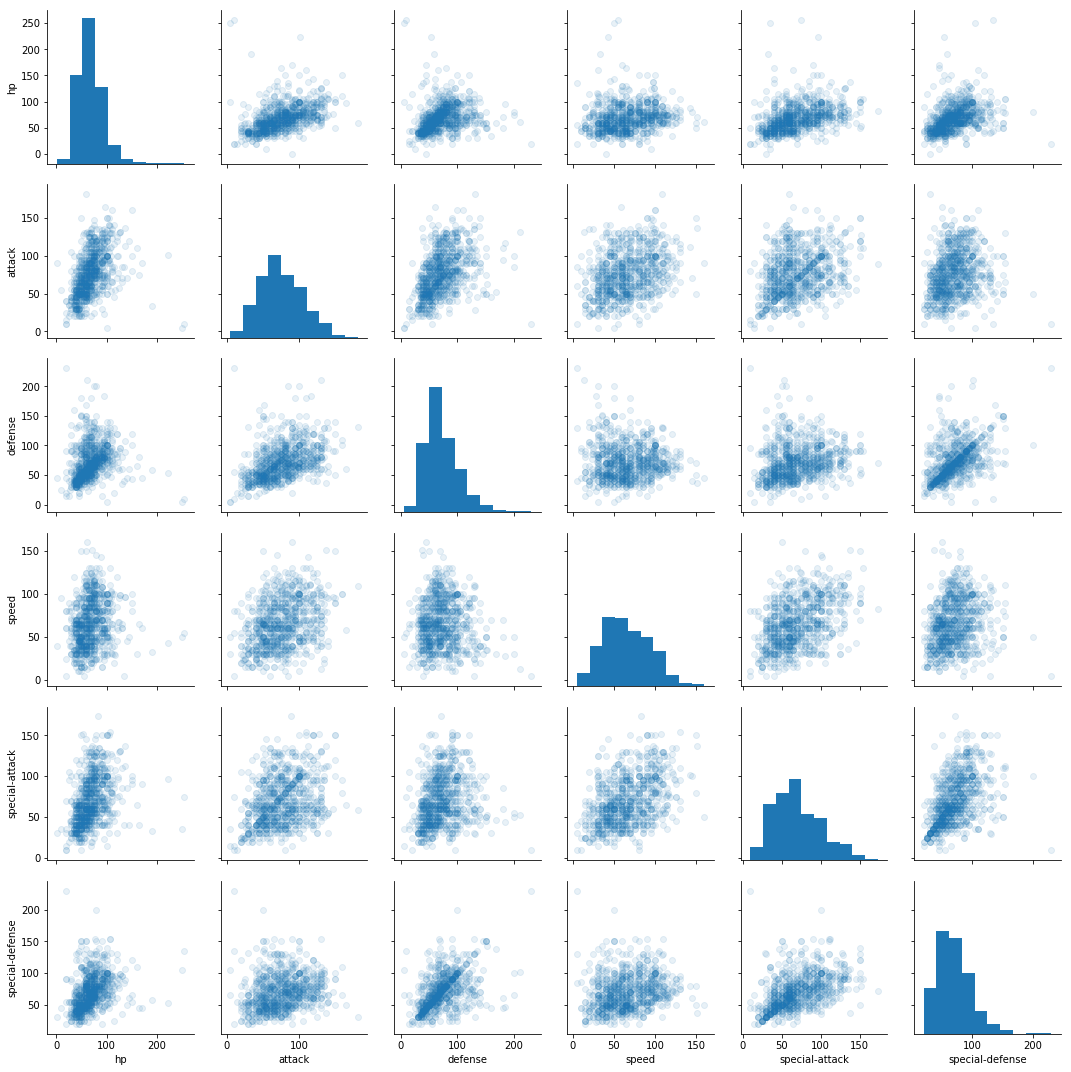

In [142]:
# use map_offdiag and map_diag to put histograms in the diagonals while the rest are scatter plots
g = sns.PairGrid(data = pokemon, vars = pkmn_stats);
g.map_offdiag(plt.scatter, alpha = 0.1);
g.map_diag(plt.hist);

In [138]:
# table of correlation levels between variables in pkmn_stats
pokemon[pkmn_stats].corr()

,hp,attack,defense,speed,special-attack,special-defense
hp,1.000000,0.433318,0.231540,0.169512,0.377446,0.367949
attack,0.433318,1.000000,0.435514,0.335289,0.325937,0.202138
defense,0.231540,0.435514,1.000000,-0.023866,0.199560,0.508688
speed,0.169512,0.335289,-0.023866,1.000000,0.440411,0.202847
special-attack,0.377446,0.325937,0.199560,0.440411,1.000000,0.481345
special-defense,0.367949,0.202138,0.508688,0.202847,0.481345,1.000000


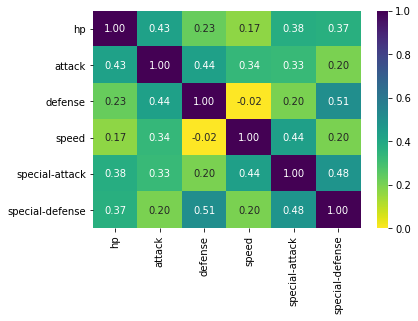

In [146]:
# heatmap of same pkmn_stats list with annotations
# vmin doesn't really do anything here, but can basically set the floor level for colors
#(ex. vmin = 0.5 makes nearly everything yellow)
# also can set center = 0 or whatever other number if there's a meaningful center point
sns.heatmap(pokemon[pkmn_stats].corr(), cmap = 'viridis_r', annot = True, fmt = '.2f', vmin = 0);

# Feature Engineering

In [148]:
# create new columns of ratios where ratio > 1 means regular greater than special and < 1 means special greater
pokemon['atk_ratio'] = pokemon['attack'] / pokemon['special-attack']
pokemon['def_ratio'] = pokemon['defense'] / pokemon['special-defense']

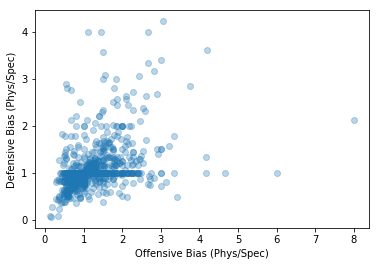

In [156]:
# create scatter plot comparing attack ratio to defense ratio
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 0.3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)');

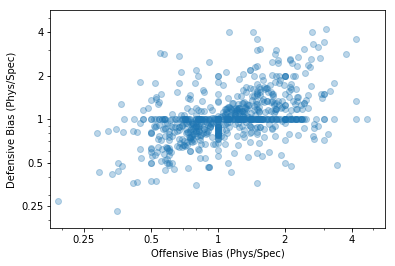

In [157]:
# use log scaling to bring out data
# set log scale tick marks
# remove outliers and center plot using xlim and ylim
plt.scatter(data = pokemon, x = 'atk_ratio', y = 'def_ratio', alpha = 0.3)
plt.xlabel('Offensive Bias (Phys/Spec)')
plt.ylabel('Defensive Bias (Phys/Spec)')
plt.xscale('log')
plt.yscale('log')
tick_loc = [0.25, 0.5, 1, 2, 4]
plt.xticks(tick_loc, tick_loc)
plt.yticks(tick_loc, tick_loc)
plt.xlim(2 ** -2.5, 2 ** 2.5)
plt.ylim(2 ** -2.5, 2 ** 2.5);